- Exercice  semaine 8 - data science
- Date limite de soumission des réponses: jeudi  11 mai 2023 à 12h
- Discussion en ligne/présentiel : Vendredi  12 mai 2023 de 16h à 18h
- Thématiques abordées : modèles de régression de machine learning et mise en production

- Instructions : Utilisez Python pour traiter les questions. Aucune autre application logicielle n’est acceptée pour l’analyse des données. Il est souhaitable de fournir votre éditeur de codes annoté avec votre devoir. 
- Le travail de cette semaine porte sur la base des données nommée «Cameroon_lung_function » et disponible à l’adresse URL : 
https://raw.githubusercontent.com/pefura/IFPERA/main/Cameroon_lung_function.csv
- Les codages utilisés pour les variables sont indiqués dans le tableau ci-dessous : 
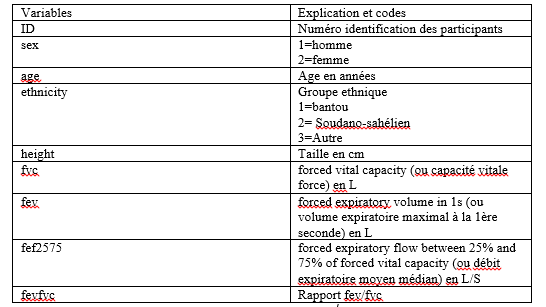


I. Partie 1 - Développement des modèles
Nous voulons prédire le rapport fev/fvc chez les sujets de sexe féminin en fonction de l’âge et de la taille. 


1.	Sélectionner la sous-base de données (que vous nommerez dataset) contenant uniquement les données des sujets de sexe féminin et les variables age, height, fev fvc.

In [1]:
import pandas as pd
import numpy as np

In [2]:
URL= "https://raw.githubusercontent.com/pefura/IFPERA/main/Cameroon_lung_function.csv"

In [3]:
data = pd.read_csv(URL, sep=";")

In [6]:
data.head()

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
0,1000948,1,4.95,1,109,1.230,1.12,1.39,0.91
1,500921,1,5.00,1,119,1.100,1.10,1.81,1.00
2,1000157,1,5.40,1,107,0.970,0.91,1.70,0.94
3,1000805,1,5.29,1,118,0.939,0.94,1.64,1.00
4,1000174,1,5.53,1,119,1.390,1.34,2.03,0.96


In [7]:
data.describe()

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
count,1.777000e+03,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000
mean,3.124471e+05,1.526168,28.334051,1.215532,158.232414,2.882609,2.498509,3.482942,0.873301
std,4.394811e+05,0.499455,17.920546,0.512486,17.068275,1.055157,0.897767,1.573516,0.071925
min,2.000000e+00,1.000000,4.450000,1.000000,103.000000,0.700000,0.650000,0.740000,0.650000
25%,1.723000e+03,1.000000,13.020000,1.000000,151.000000,2.070000,1.800000,2.310000,0.830000
50%,4.299000e+03,2.000000,24.457221,1.000000,162.000000,2.850000,2.460000,3.260000,0.880000
75%,1.000071e+06,2.000000,40.030116,1.000000,170.000000,3.580000,3.110000,4.320000,0.930000
max,1.005209e+06,2.000000,88.131417,3.000000,196.000000,7.510000,5.910000,10.440000,1.000000


In [8]:
data.shape

(1777, 9)

In [9]:
df = data.copy()

In [10]:
df_female = df.query('sex==2')
dataset = df_female[['age', 'height', 'fev', 'fvc']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 842 to 1776
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     935 non-null    float64
 1   height  935 non-null    int64  
 2   fev     935 non-null    float64
 3   fvc     935 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 36.5 KB


2.	Calculer fev/fvc pour tous les sujets de sexe féminin et inclure cette variable dans dataset.

In [13]:
dataset["fev/fvc"] = dataset['fev']/dataset['fvc']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 842 to 1776
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      935 non-null    float64
 1   height   935 non-null    int64  
 2   fev      935 non-null    float64
 3   fvc      935 non-null    float64
 4   fev/fvc  935 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 43.8 KB


<ipython-input-13-6677d2de6322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["fev/fvc"] = dataset['fev']/dataset['fvc']


In [14]:
dataset.describe()

,age,height,fev,fvc,fev/fvc
count,935.000000,935.000000,935.000000,935.000000,935.000000
mean,28.415408,154.899465,2.214193,2.544534,0.876123
std,18.090971,15.090752,0.676284,0.786705,0.075542
min,4.450000,104.000000,0.650000,0.700000,0.646667
25%,12.865000,150.000000,1.710000,1.960000,0.829853
50%,24.158795,159.000000,2.280000,2.630000,0.882022
75%,40.658453,165.000000,2.700000,3.120000,0.930464
max,88.131417,188.000000,4.580000,5.190000,1.387500


In [15]:
dataset_clean = dataset.query('fev/fvc <=1 ')
dataset_clean.shape

(931, 5)

3.	Décrire graphiquement la relation entre fev/fvc (variable expliquée) et l’âge d’une part et entre fev/fvc et la taille d’autre part. Quelles conclusions pouvez-vous tirer ?

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='fev/fvc'>

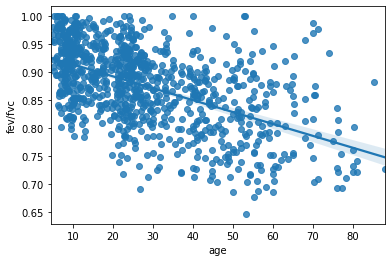

In [18]:
sns.regplot(data = dataset_clean, x = "age" , y="fev/fvc")

<AxesSubplot:xlabel='height', ylabel='fev/fvc'>

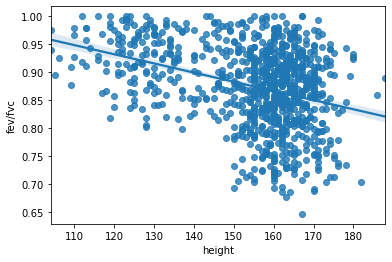

In [19]:
sns.regplot(data = dataset_clean, x = "height" , y="fev/fvc")

In [20]:
# Defining target(y) and features (X)
y = dataset_clean['fev/fvc']
X = dataset_clean.drop(columns =['fev', 'fvc','fev/fvc'])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (931, 2)
y shape: (931,)


In [21]:
# Example, import a module to split dataset in train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (744, 2)
y_train shape: (744,)
X_test shape: (187, 2)
y_test shape: (187,)


In [22]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.0987059 ,  0.0625    ],
       [-0.55968061, -2.125     ],
       [-0.0855582 ,  0.375     ],
       ...,
       [ 0.33075308,  0.375     ],
       [ 0.12872976,  0.5625    ],
       [ 0.57015904,  0.6875    ]])

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
GB_reg = GradientBoostingRegressor (random_state=0)

# Recherche des hyperparamètres optimaux: random Forest
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(GB_reg, distributions, random_state=0, scoring = 'neg_root_mean_squared_error')
search =  Rand_CV.fit(X_train, y_train)
 
search.best_params_  # Meilleurs paramètres

{'n_estimators': 225, 'max_depth': 2}

In [24]:
GB_reg_final= GradientBoostingRegressor(n_estimators=225, max_depth=2,random_state=0)
cross_validation =5
score_RSME_GB = cross_val_score(GB_reg_final, X_train, y_train, cv=cross_validation, scoring ="neg_root_mean_squared_error")
print('score folds RSME GB')
print(score_RSME_GB)
print('Mean RSME GB:', '{:.3f}'.format(score_RSME_GB.mean()))

<IPython.core.display.Javascript object>

score folds RSME GB
[-0.06342752 -0.05893455 -0.0636957  -0.07064202 -0.06470584]
Mean RSME GB: -0.064


In [26]:
from sklearn.neural_network import MLPRegressor
MLP_reg = MLPRegressor(random_state=0)

# Recherche des hyperparamètres optimaux: random Forest
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(hidden_layer_sizes=np.arange(1,1000))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(MLP_reg, distributions, random_state=0, scoring = 'neg_root_mean_squared_error')
search =  Rand_CV.fit(X_train_scaled, y_train)
 
search.best_params_  # Meilleurs paramètres

{'hidden_layer_sizes': 878}

In [27]:
MLP_reg_final= MLPRegressor(hidden_layer_sizes=878, random_state=0)
cross_validation =5
score_RSME_MLP = cross_val_score(MLP_reg_final, X_train_scaled, y_train, cv=cross_validation, scoring ="neg_root_mean_squared_error")
print('score folds RSME MLP')
print(score_RSME_MLP)
print('Mean RSME MLP:', '{:.3f}'.format(score_RSME_MLP.mean()))

<IPython.core.display.Javascript object>

score folds RSME MLP
[-0.06365824 -0.0603024  -0.06186415 -0.06794912 -0.06411395]
Mean RSME MLP: -0.064


In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Courbe d'apprentissage du GB
N, train_score_GB, val_score_GB = learning_curve(GB_reg_final, X_train, y_train,  scoring='neg_root_mean_squared_error',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

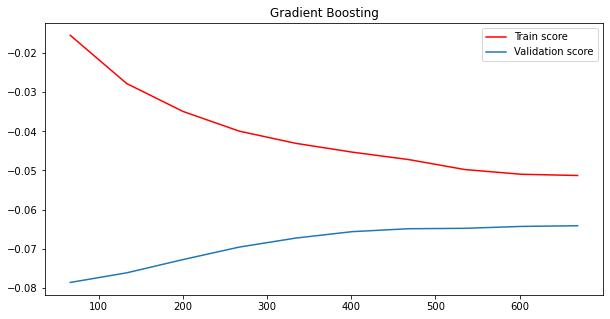

In [29]:
# Representation graphique des differentes courbes
figure, axis = plt.subplots(figsize=(10, 5))

# For GB
axis.plot(N, train_score_GB.mean(axis=1), color = "red")    
axis.plot(N, val_score_GB.mean(axis=1))
axis.set_title("Gradient Boosting")
axis.legend(['Train score', 'Validation score'])
axis.grid(visible = None)

In [30]:
# Courbe d'apprentissage du ANN
N, train_score_MLP, val_score_MLP = learning_curve(MLP_reg_final, X_train_scaled, y_train,  scoring='neg_root_mean_squared_error',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

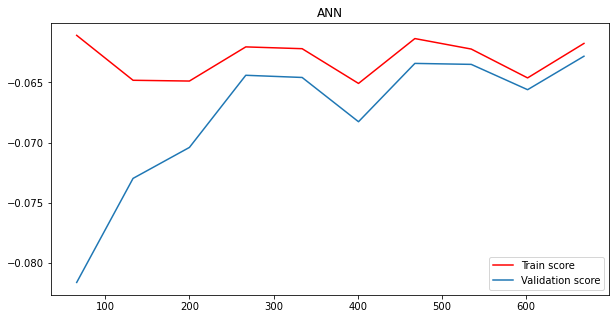

In [31]:
# Representation graphique des differentes courbes
figure, axis = plt.subplots(figsize=(10, 5))

# For ANN
axis.plot(N, train_score_MLP.mean(axis=1), color = "red")    
axis.plot(N, val_score_MLP.mean(axis=1))
axis.set_title("ANN")
axis.legend(['Train score', 'Validation score'])
axis.grid(visible = None)

In [ ]:
# pas de stabilisation du modèle d'ANN sur cet échantillon. Choisir le gradient boosting malgré les RMSE +/-equivalents. 


Evaluation sur les données non vues

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
from RegscorePy import *

def evaluation(model, X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MeAE = median_absolute_error(y_test, y_pred)
    AIC= aic.aic(y_test, y_pred, 2)
    BIC = bic.bic(y_test, y_pred, 2)
    print('R2:', round(R2, 3))
    print('MSE:', round(MSE, 3))
    print('MAE:', round(MAE, 3))
    print('MeAE:', round(MeAE, 3))
    print('RMSE:', round(np.sqrt(MSE),3))
    print('AIC:', round(AIC,3))
    print('BIC:', round(BIC,3))

In [35]:
# Gradient boosting
print("Gradient boosting metrics")
evaluation(model=GB_reg_final , X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Gradient boosting metrics
R2: 0.363
MSE: 0.004
MAE: 0.049
MeAE: 0.042
RMSE: 0.06
AIC: -1048.973
BIC: -1042.511


In [36]:
# ANN
X_test_scaled = scaler.transform(X_test)
print("ANN metrics")
evaluation(model=MLP_reg_final , X_train = X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)

ANN metrics
R2: 0.392
MSE: 0.003
MAE: 0.049
MeAE: 0.046
RMSE: 0.058
AIC: -1057.773
BIC: -1051.311


In [77]:
# l'ANN semble être meilleur sur les données du test set mais les courbes d'apprentissage ne se sont pas 
# stabilisées dans cet échantillon. 

II. Partie 2- Mise en production des modèles
Dans cette partie nous décidons d’utiliser le gradient boosting pour la prédiction de l’espérance et des limites inférieure et supérieure (IC à 90%) du fev/fvc. 


5.	Quelles sont les contributions relatives de chaque variable explicative ?

In [38]:
from yellowbrick.model_selection import FeatureImportances

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


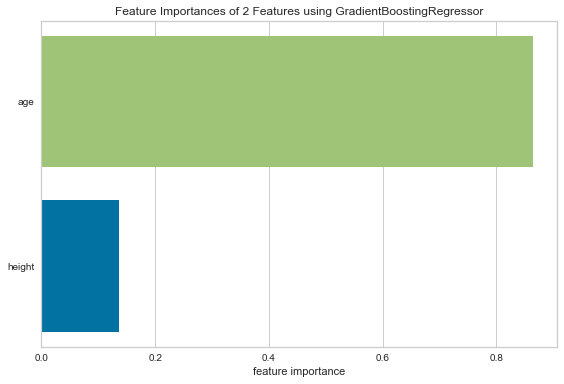

<AxesSubplot:title={'center':'Feature Importances of 2 Features using GradientBoostingRegressor'}, xlabel='feature importance'>

In [40]:
viz = FeatureImportances(GB_reg_final,relative = False)
viz.fit(X_train, y_train)
viz.show()

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


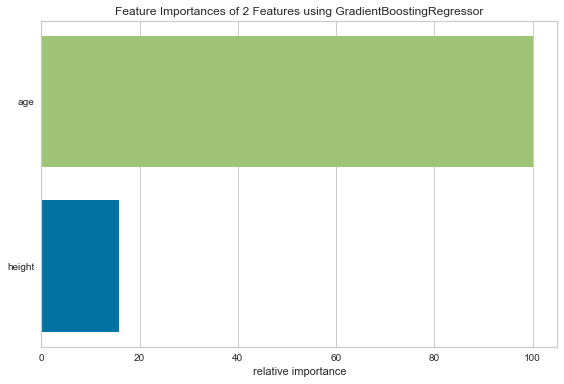

<AxesSubplot:title={'center':'Feature Importances of 2 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [41]:
viz = FeatureImportances(GB_reg_final,relative = True)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
# L'âge est le paramètre le plus important (85% de poids dans la prédiction de fev/fvc)

6.	Définir ou construire  une fonction de prédiction de l’espérance et des limites inférieure et supérieure de fev/fvc

In [42]:
## Fonction de calcul
def prediction_FEV_FVC (age, height):
    # Prediction espérance = médiane
    fit_median = GradientBoostingRegressor(loss="quantile", alpha=0.50, random_state=0)
    fit_median.fit(X_train, y_train)
    # Prédiction LLN
    fit_LLN= GradientBoostingRegressor(loss="quantile", alpha=0.05, random_state=0)
    fit_LLN.fit(X_train, y_train)
    # Prédiction ULN
    fit_ULN= GradientBoostingRegressor(loss="quantile", alpha=0.95, random_state=0)
    fit_ULN.fit(X_train, y_train)
    var = {'age':[age],
        'height':[height]}
    X1 = pd.DataFrame (var)
    pred_median = fit_median.predict(X1)
    LLN = fit_LLN.predict(X1)
    ULN = fit_ULN.predict(X1)
    table = pd.DataFrame([LLN [0],pred_median[0], ULN[0]]).T
    table.columns = ["LLN", "median", "ULN"]
    return table

In [44]:
pred = prediction_FEV_FVC (age=45, height=168).T
pred.columns = ["values"]
prediction = pred.T
prediction

,LLN,median,ULN
values,0.720106,0.829911,0.963109


7.	Mettre en production à l’aide de la librairie « streamlit » le modèle de gradient boosting permettant de faire les prédictions ci-dessus. Il s’agit de développer une application avec interface utilisateur permettant d’obtenir directement les prédictions souhaitées en fonction des caractéristiques fournies.  Le lien de l’application développée devrait être fourni. 

In [ ]:
# Voir developpement dans pycharm et streamlit